<a href="https://colab.research.google.com/github/husainattar/HaarCascade_Plate/blob/master/HaarCascadeProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## **Haar Cascade Implementation Class**

In [0]:
class Haar :

  def detect(self,img):
    
    #it is the classifer which uses the xml of HaarCascade
    plate_cascade=cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/plate2.xml')
    
    #Detecting the plate in the given img using from classifier created
    plate_rect=plate_cascade.detectMultiScale(img)

    for (x,y,w,h) in plate_rect:
      #Drawing rectangle on the plate detected
      cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
      
      #Slicing the Region of interest 
      roi_plate=img[y:y+h,x:x+w]
      
      #Using Blurring technique which is medianBlur to Blur out using Kernel Size=9 
      #Note:use odd kernel size

      blur_plate=cv2.medianBlur(roi_plate,9)
      
      #Replacing the plate part  with blured Part
      img[y:y+h,x:x+w]=blur_plate

    return img



# Read the Image and pass into Haar Class 


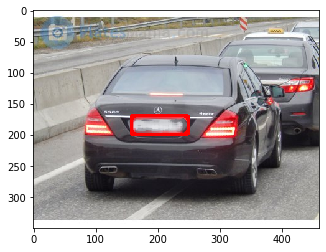

In [58]:

img=cv2.imread('/content/drive/My Drive/Colab Notebooks/img1.jpg')

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#img=cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
#plt.imshow(img)
haar=Haar()
#passing the image
haarimg=haar.detect(img)
#haar2=cv2.cvtColor(haarimg,cv2.COLOR_GRAY2RGB)
#Showing the result
plt.imshow(haarimg)